<a href="https://colab.research.google.com/github/jambdeep/SALLE-FAyD-2022/blob/main/22-04-25/TFF_ruido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# carga de librerías
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Descripción de las señales
t =np.arange(0, 1, 0.001)
frec_1 = 50 # Frecuencia en Hz
frec_2 = 120 # Frecuencia en Hz
signal_limpia = np.sin(2*np.pi*frec_1*t) + np.sin(2*np.pi*frec_2*t) # Señal
signal_ruido = signal_limpia + 2.5*np.random.randn(len(t))

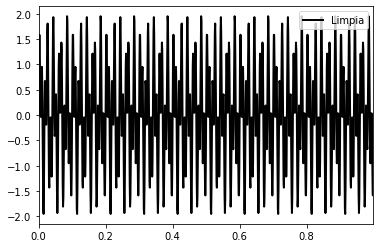

In [ ]:
# Gráfica de la señal limpia
fig=plt.figure()
plt.plot(t,signal_limpia,color='k',LineWidth=2,label='Limpia')
plt.xlim(t[0],t[-1])
plt.legend()

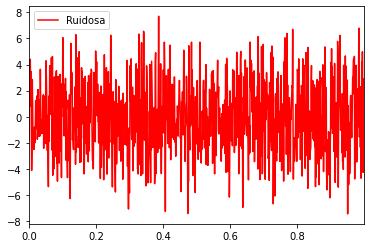

In [ ]:
# Gráfica de la señal con ruido
fig=plt.figure()
plt.plot(t,signal_ruido,color='r',LineWidth=1.5,label='Ruidosa')
plt.xlim(t[0],t[-1])
plt.legend()

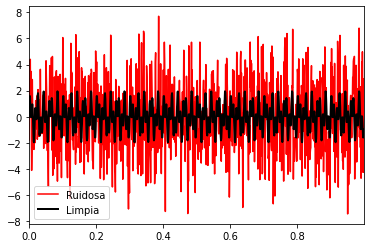

In [ ]:
# Gráfica comparativa de las dos señales
fig=plt.figure()
plt.plot(t,signal_ruido,color='r',LineWidth=1.5,label='Ruidosa')
plt.plot(t,signal_limpia,color='k',LineWidth=2,label='Limpia')
plt.xlim(t[0],t[-1])
plt.legend()

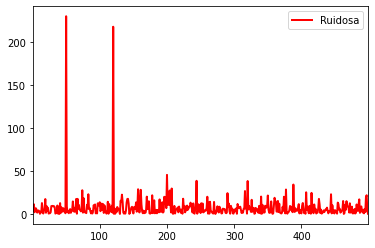

In [ ]:
# Transformada Discreta de Fourier y su PSD
N = len(t)
TDFfast = np.fft.fft(signal_ruido,N)                     
PSD = (np.abs(TDFfast)*np.abs(TDFfast))/N
frecuencias = np.arange(N)           
Mitad = np.arange(1,np.floor(N/2),dtype='int') 
fig=plt.figure()
plt.plot(frecuencias[Mitad],PSD[Mitad],color='r',LineWidth=2,label='Ruidosa')
plt.xlim(frecuencias[Mitad[0]],frecuencias[Mitad[-1]])
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


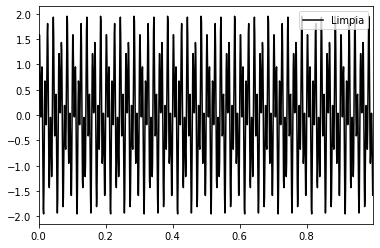

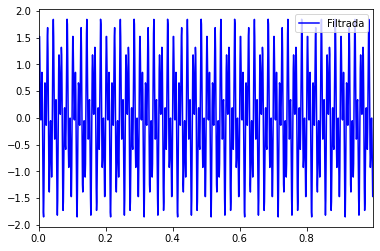

In [ ]:
indices = PSD > 100       
PSD_mod = PSD * indices  
TDFfast_mod = indices * TDFfast     
signal_filtrada = np.fft.ifft(TDFfast_mod) 

fig=plt.figure()
plt.plot(t,signal_limpia,color='k',LineWidth=1.5,label='Limpia')
plt.xlim(t[0],t[-1])
plt.legend()
fig=plt.figure()
plt.plot(t,signal_filtrada,color='b',LineWidth=1.5,label='Filtrada')
plt.xlim(t[0],t[-1])
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


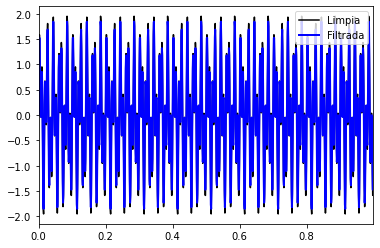

In [ ]:
fig=plt.figure()
plt.plot(t,signal_limpia,color='k',LineWidth=1.5,label='Limpia')
plt.plot(t,signal_filtrada,color='b',LineWidth=2,label='Filtrada')
plt.xlim(t[0],t[-1])
plt.legend()

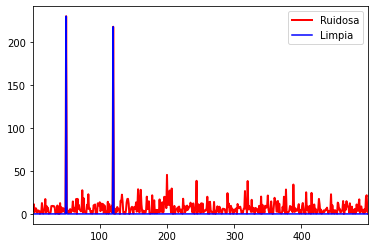

In [ ]:
fig=plt.figure()
plt.plot(frecuencias[Mitad],PSD[Mitad],color='r',LineWidth=2,label='Ruidosa')
plt.plot(frecuencias[Mitad],PSD_mod[Mitad],color='b',LineWidth=1.5,label='Limpia')
plt.xlim(frecuencias[Mitad[0]],frecuencias[Mitad[-1]])
plt.legend()